## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   5.988792  1596.808118  0.491682  10.993299   785.131678
1  31.625439   727.064630  0.574927  10.670066   419.178031
2  90.413819  1561.945586  0.811324   3.181282  1270.296521
3  43.760735   996.143913  0.733484   5.393267   732.009872
4  69.837221   334.807929  0.045235   5.191530    71.751042


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9150426	total: 58.1ms	remaining: 58s
1:	learn: 0.9053962	total: 58.7ms	remaining: 29.3s
2:	learn: 0.8965713	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8859678	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8742364	total: 60.1ms	remaining: 12s
5:	learn: 0.8662669	total: 60.6ms	remaining: 10s
6:	learn: 0.8556580	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8450764	total: 61.8ms	remaining: 7.67s
8:	learn: 0.8345803	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8232229	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8126143	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8011185	total: 64ms	remaining: 5.27s
12:	learn: 0.7903805	total: 64.5ms	remaining: 4.89s
13:	learn: 0.7807434	total: 65ms	remaining: 4.58s
14:	learn: 0.7714389	total: 65.4ms	remaining: 4.29s
15:	learn: 0.7618131	total: 65.8ms	remaining: 4.05s
16:	learn: 0.7527314	total: 66.1ms	remaining: 3.83s
17:	learn: 0.7463630	total: 66.6ms	remaining: 3.63s
18:	learn: 0.7383512	total: 67.1ms	remaining: 3.46s
19

108:	learn: 0.2763193	total: 110ms	remaining: 898ms
109:	learn: 0.2734473	total: 110ms	remaining: 893ms
110:	learn: 0.2701492	total: 111ms	remaining: 888ms
111:	learn: 0.2672297	total: 111ms	remaining: 883ms
112:	learn: 0.2651244	total: 112ms	remaining: 877ms
113:	learn: 0.2623495	total: 112ms	remaining: 872ms
114:	learn: 0.2600645	total: 113ms	remaining: 867ms
115:	learn: 0.2573616	total: 113ms	remaining: 862ms
116:	learn: 0.2546393	total: 114ms	remaining: 857ms
117:	learn: 0.2520433	total: 114ms	remaining: 852ms
118:	learn: 0.2495066	total: 114ms	remaining: 847ms
119:	learn: 0.2470815	total: 115ms	remaining: 842ms
120:	learn: 0.2439142	total: 115ms	remaining: 837ms
121:	learn: 0.2424948	total: 116ms	remaining: 832ms
122:	learn: 0.2396926	total: 116ms	remaining: 828ms
123:	learn: 0.2375232	total: 117ms	remaining: 823ms
124:	learn: 0.2349351	total: 117ms	remaining: 819ms
125:	learn: 0.2327397	total: 118ms	remaining: 816ms
126:	learn: 0.2312166	total: 118ms	remaining: 810ms
127:	learn: 

258:	learn: 0.0811598	total: 186ms	remaining: 532ms
259:	learn: 0.0807224	total: 187ms	remaining: 531ms
260:	learn: 0.0801608	total: 187ms	remaining: 530ms
261:	learn: 0.0796609	total: 187ms	remaining: 528ms
262:	learn: 0.0792068	total: 188ms	remaining: 527ms
263:	learn: 0.0785710	total: 189ms	remaining: 526ms
264:	learn: 0.0780579	total: 189ms	remaining: 525ms
265:	learn: 0.0776575	total: 190ms	remaining: 523ms
266:	learn: 0.0771342	total: 190ms	remaining: 522ms
267:	learn: 0.0765676	total: 191ms	remaining: 521ms
268:	learn: 0.0759972	total: 191ms	remaining: 519ms
269:	learn: 0.0754828	total: 192ms	remaining: 518ms
270:	learn: 0.0749990	total: 192ms	remaining: 517ms
271:	learn: 0.0745305	total: 192ms	remaining: 515ms
272:	learn: 0.0741164	total: 193ms	remaining: 514ms
273:	learn: 0.0736089	total: 193ms	remaining: 512ms
274:	learn: 0.0731121	total: 194ms	remaining: 511ms
275:	learn: 0.0726633	total: 194ms	remaining: 509ms
276:	learn: 0.0721835	total: 195ms	remaining: 508ms
277:	learn: 

500:	learn: 0.0287918	total: 290ms	remaining: 289ms
501:	learn: 0.0286523	total: 291ms	remaining: 288ms
502:	learn: 0.0285031	total: 291ms	remaining: 288ms
503:	learn: 0.0284071	total: 292ms	remaining: 287ms
504:	learn: 0.0283111	total: 292ms	remaining: 286ms
505:	learn: 0.0281678	total: 293ms	remaining: 286ms
506:	learn: 0.0280290	total: 293ms	remaining: 285ms
507:	learn: 0.0278953	total: 294ms	remaining: 284ms
508:	learn: 0.0278040	total: 294ms	remaining: 284ms
509:	learn: 0.0276729	total: 294ms	remaining: 283ms
510:	learn: 0.0275587	total: 295ms	remaining: 282ms
511:	learn: 0.0274678	total: 295ms	remaining: 282ms
512:	learn: 0.0273330	total: 296ms	remaining: 281ms
513:	learn: 0.0272440	total: 296ms	remaining: 280ms
514:	learn: 0.0271095	total: 297ms	remaining: 279ms
515:	learn: 0.0270225	total: 297ms	remaining: 279ms
516:	learn: 0.0269369	total: 298ms	remaining: 278ms
517:	learn: 0.0268076	total: 298ms	remaining: 277ms
518:	learn: 0.0267239	total: 298ms	remaining: 276ms
519:	learn: 

668:	learn: 0.0154784	total: 365ms	remaining: 181ms
669:	learn: 0.0154173	total: 366ms	remaining: 180ms
670:	learn: 0.0154043	total: 366ms	remaining: 179ms
671:	learn: 0.0153179	total: 366ms	remaining: 179ms
672:	learn: 0.0152590	total: 367ms	remaining: 178ms
673:	learn: 0.0152463	total: 367ms	remaining: 178ms
674:	learn: 0.0151628	total: 368ms	remaining: 177ms
675:	learn: 0.0151504	total: 368ms	remaining: 177ms
676:	learn: 0.0150933	total: 369ms	remaining: 176ms
677:	learn: 0.0150195	total: 369ms	remaining: 175ms
678:	learn: 0.0149560	total: 370ms	remaining: 175ms
679:	learn: 0.0149311	total: 370ms	remaining: 174ms
680:	learn: 0.0149173	total: 371ms	remaining: 174ms
681:	learn: 0.0149036	total: 371ms	remaining: 173ms
682:	learn: 0.0148400	total: 371ms	remaining: 172ms
683:	learn: 0.0148265	total: 372ms	remaining: 172ms
684:	learn: 0.0147493	total: 372ms	remaining: 171ms
685:	learn: 0.0146702	total: 373ms	remaining: 171ms
686:	learn: 0.0145951	total: 373ms	remaining: 170ms
687:	learn: 

890:	learn: 0.0081771	total: 469ms	remaining: 57.4ms
891:	learn: 0.0081732	total: 470ms	remaining: 56.9ms
892:	learn: 0.0081490	total: 470ms	remaining: 56.3ms
893:	learn: 0.0081387	total: 471ms	remaining: 55.8ms
894:	learn: 0.0081349	total: 471ms	remaining: 55.3ms
895:	learn: 0.0080950	total: 471ms	remaining: 54.7ms
896:	learn: 0.0080726	total: 472ms	remaining: 54.2ms
897:	learn: 0.0080686	total: 472ms	remaining: 53.6ms
898:	learn: 0.0080647	total: 473ms	remaining: 53.1ms
899:	learn: 0.0080426	total: 473ms	remaining: 52.6ms
900:	learn: 0.0080388	total: 474ms	remaining: 52.1ms
901:	learn: 0.0080155	total: 474ms	remaining: 51.5ms
902:	learn: 0.0080117	total: 475ms	remaining: 51ms
903:	learn: 0.0079846	total: 475ms	remaining: 50.4ms
904:	learn: 0.0079705	total: 475ms	remaining: 49.9ms
905:	learn: 0.0079667	total: 476ms	remaining: 49.4ms
906:	learn: 0.0079631	total: 476ms	remaining: 48.8ms
907:	learn: 0.0079248	total: 477ms	remaining: 48.3ms
908:	learn: 0.0079108	total: 477ms	remaining: 47

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


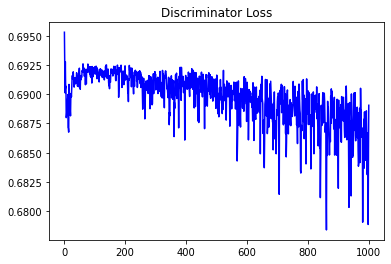

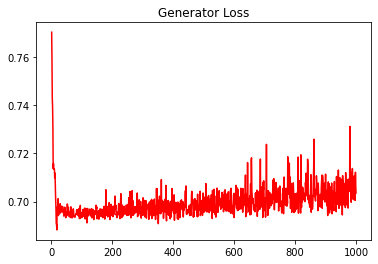

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01187740464545013


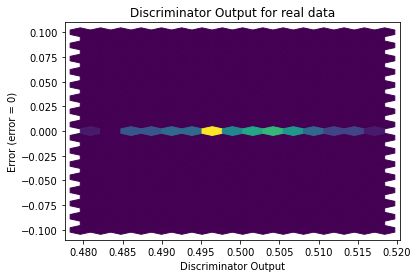

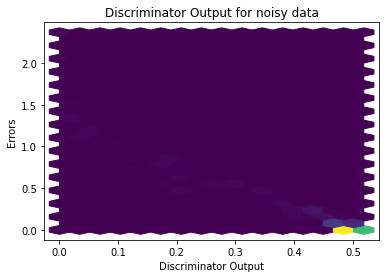

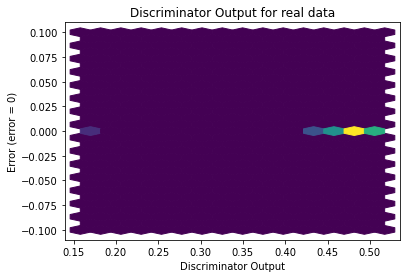

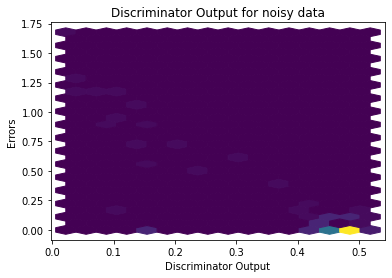

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1976]], requires_grad=True)
